<h2 style='color:blue' align='center'>Sports Celebrity Image Classification<h2>

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import os

<h3 style='color:purple'>(1) Preprocessing: Detect face and eyes</h3>

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do you detect face and eyes?

We will use haar cascade from opencv for this. Here is an article on this: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html?highlight=haar

In [2]:
img = cv2.imread('./test_images/Cristiano_Ronaldo.jpg')
img.shape

(225, 225, 3)

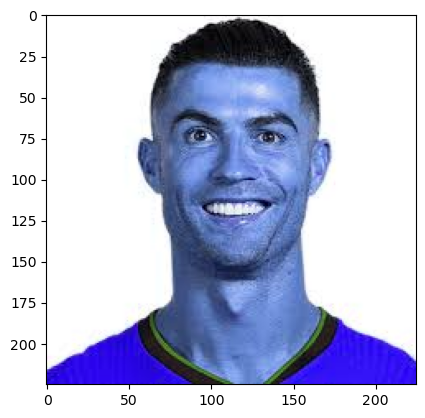

In [3]:
plt.imshow(img)
plt.show()

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(225, 225)

In [5]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 69,  59,  67, ...,  86,  84,  88],
       [ 62,  71,  80, ...,  85,  84,  92],
       [ 66,  71,  77, ...,  83,  92,  89]], dtype=uint8)

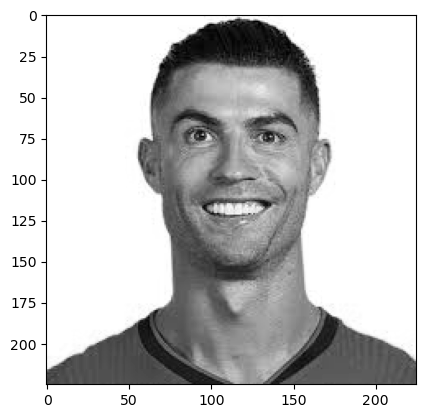

In [6]:
plt.imshow(gray, cmap='gray')
plt.show()

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 61,  29, 111, 111]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(61, 29, 111, 111)

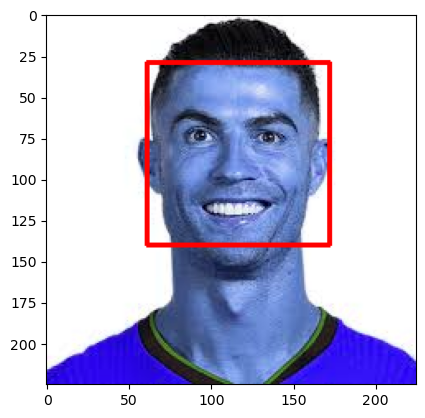

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.show()

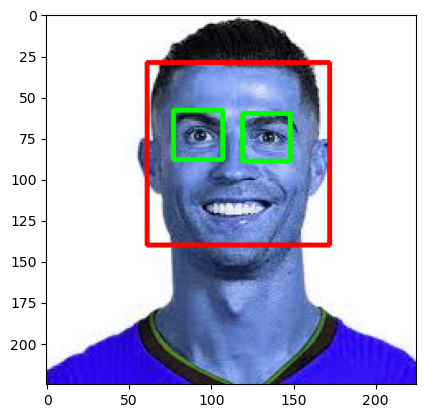

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

<h3 style='color:purple'>(2) Preprocessing: Crop the facial region of the image</h3>

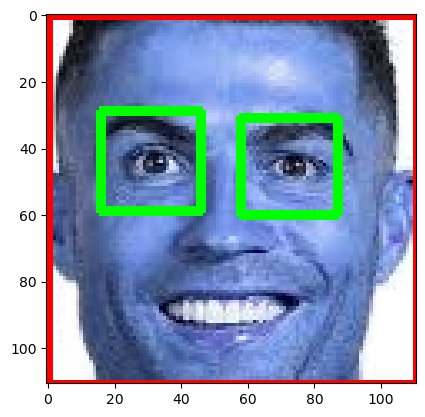

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show()

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(111, 111, 3)

<h3 style='color:purple'>(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region</h3>

####  Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)

    # ✅ Check if image is loaded properly
    if img is None:
        print(f"⚠️ Warning: Could not read image {image_path}. Skipping...")
        return None  
        
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # No error here if img is valid
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) >= 2:
            return roi_color  # ✅ Return cropped face

    return None  # ✅ Return None if no valid face is found


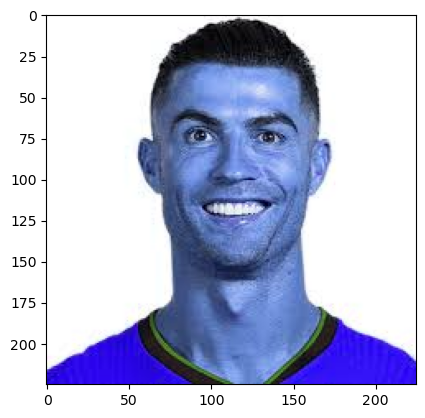

In [14]:
original_image = cv2.imread('./test_images/Cristiano_Ronaldo.jpg')
plt.imshow(original_image)
plt.show()

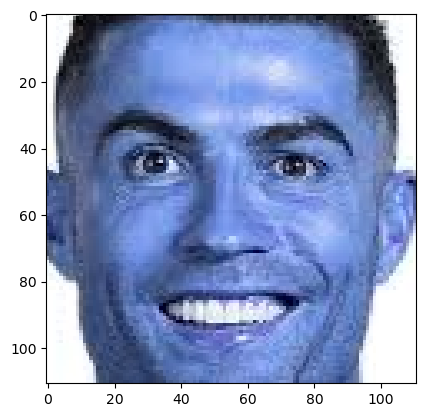

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Cristiano_Ronaldo.jpg')
plt.imshow(cropped_image)
plt.show()

**In below image face is not very clear and it doesn't have two eyes clearly visible**

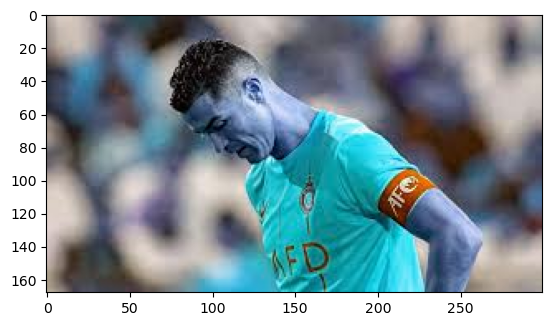

In [16]:
org_image_obstructed = cv2.imread('./test_images/Cristiano Ronaldo.jpg')
plt.imshow(org_image_obstructed)
plt.show()

In [17]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/Cristiano Ronaldo.jpg')
cropped_image_no_2_eyes

**Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training**

In [20]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [22]:
img_dirs

['./dataset/antoine dupont',
 './dataset/Barry Bonds',
 './dataset/cristiano ronaldo',
 './dataset/Fan Zhendong',
 './dataset/Gabrielle Reece',
 './dataset/jessica alba',
 './dataset/LeBron James',
 './dataset/serena williams',
 './dataset/Taylor Kitsch',
 './dataset/usain bolt']

**Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code**

In [23]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [24]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

⚠️ Warning: Could not read image ./dataset/antoine dupont\+RBWk3ni56F3OSOZkMwD9QQmiRrJV+Hhy4QcixI6ehGPMQEKPGqewmIpckoGyefC4nLR9fegkovobi7cr8gmLDM2Ki9TsTPYq1Ps2Jzeo0ofzUHqkjzZGUHWsnNS4PjTPOUPjJ7QLcL8DjwhvzYQc3oTMyvwAAAABJRU5ErkJggg==.png. Skipping...
Generating cropped images in folder:  ./dataset/cropped/antoine dupont
⚠️ Warning: Could not read image ./dataset/antoine dupont\Antoine Dupont a toujours rêvé de faire ....jpg. Skipping...
⚠️ Warning: Could not read image ./dataset/antoine dupont\Antoine Dupont autorisé à jouer le ....jpg. Skipping...
⚠️ Warning: Could not read image ./dataset/antoine dupont\Antoine Dupont Chirurgie Esthétique _ A ....jpg. Skipping...
⚠️ Warning: Could not read image ./dataset/antoine dupont\Antoine Dupont confirme sa séparation !.jpg. Skipping...
⚠️ Warning: Could not read image ./dataset/antoine dupont\Antoine Dupont en 2ème centre _ est-ce ....jpg. Skipping...
⚠️ Warning: Could not read image ./dataset/antoine dupont\Antoine Dupont et la quête de la ...

### Now you should have cropped folder under datasets folder that contains cropped images

### Manually examine cropped folder and delete any unwanted images

In [25]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'antoine dupont': ['./dataset/cropped/antoine dupont\\antoine dupont1.png',
  './dataset/cropped/antoine dupont\\antoine dupont10.png',
  './dataset/cropped/antoine dupont\\antoine dupont11.png',
  './dataset/cropped/antoine dupont\\antoine dupont12.png',
  './dataset/cropped/antoine dupont\\antoine dupont13.png',
  './dataset/cropped/antoine dupont\\antoine dupont14.png',
  './dataset/cropped/antoine dupont\\antoine dupont15.png',
  './dataset/cropped/antoine dupont\\antoine dupont17.png',
  './dataset/cropped/antoine dupont\\antoine dupont18.png',
  './dataset/cropped/antoine dupont\\antoine dupont19.png',
  './dataset/cropped/antoine dupont\\antoine dupont2.png',
  './dataset/cropped/antoine dupont\\antoine dupont20.png',
  './dataset/cropped/antoine dupont\\antoine dupont21.png',
  './dataset/cropped/antoine dupont\\antoine dupont22.png',
  './dataset/cropped/antoine dupont\\antoine dupont23.png',
  './dataset/cropped/antoine dupont\\antoine dupont4.png',
  './dataset/cropped/anto

<h3 style='color:purple'>(3) Preprocessing: Use wavelet transform as a feature for traning our model</h3>

#### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

### Wavelet transform

In [26]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

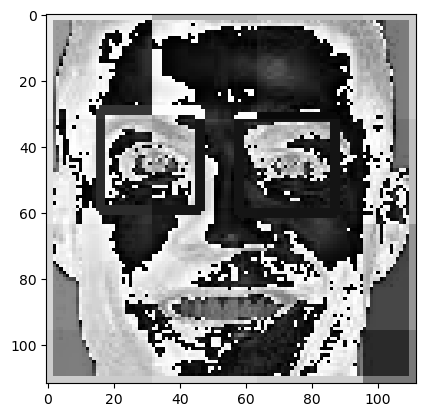

In [27]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')
plt.show()

#### You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

In [28]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'antoine dupont': 0,
 'Barry Bonds': 1,
 'cristiano ronaldo': 2,
 'Fan Zhendong': 3,
 'Gabrielle Reece': 4,
 'jessica alba': 5,
 'LeBron James': 6,
 'serena williams': 7,
 'Taylor Kitsch': 8,
 'usain bolt': 9}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [29]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [30]:
len(X[0])

4096

In [31]:
32*32*3 + 32*32

4096

In [32]:
X[0]

array([[ 59],
       [ 53],
       [100],
       ...,
       [230],
       [224],
       [222]], dtype=uint8)

In [33]:
y[0]

0

In [34]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(425, 4096)

In [35]:
X[0]

array([ 59.,  53., 100., ..., 230., 224., 222.])

### Data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned  with heuristic finetuning

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.1, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.9767441860465116

In [40]:
len(X_test)

43

In [41]:
len(y_test)

43

### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [45]:
print(classification_report(y_test, pipe.predict(X_test), zero_division=1))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      0.00      0.00         1
           5       0.94      1.00      0.97        15
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         2

    accuracy                           0.98        43
   macro avg       0.99      0.90      0.90        43
weighted avg       0.98      0.98      0.97        43



In [47]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

In [48]:
# Define the classifiers and their parameter grids
classifiers = {
    'SVM': {
        'model': svm.SVC(),
        'params': {
            'model__C': [0.1, 1, 10, 100],
            'model__kernel': ['linear', 'rbf', 'poly'],
            'model__gamma': ['scale', 'auto']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'model__C': [0.1, 1, 10, 100],
            'model__penalty': ['l2'],
            'model__solver': ['lbfgs', 'liblinear']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7, 9],
            'model__weights': ['uniform', 'distance'],
            'model__metric': ['euclidean', 'manhattan']
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__criterion': ['gini', 'entropy']
        }
    }
}



In [49]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize dictionaries to store results and best estimators
results_dict = {}
best_estimators = {}

# Iterate over each classifier and perform grid search
for clf_name, clf_info in classifiers.items():
    print(f"Training and tuning {clf_name}...")
    
    # Create a pipeline with StandardScaler and the classifier
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', clf_info['model'])
    ])
    
    # Perform grid search
    grid_search = GridSearchCV(pipeline, clf_info['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Evaluate on the test set
    y_pred = grid_search.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Store the results in the dictionary
    results_dict[clf_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'test_f1': test_f1,
        'best_estimator': grid_search.best_estimator_  # Store the best model
    }
    
    # Store the best estimator in the best_estimators dictionary
    best_estimators[clf_name] = grid_search.best_estimator_
    
    # Print classification report
    print(f"Classification report for {clf_name}:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("-" * 60)



Training and tuning SVM...
Classification report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.93      0.87      0.90        15
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4
           8       0.92      1.00      0.96        11
           9       1.00      1.00      1.00         2

    accuracy                           0.93        43
   macro avg       0.85      0.89      0.87        43
weighted avg       0.92      0.93      0.92        43

------------------------------------------------------------
Training and tuning RandomForest...
Classification report for RandomForest:
              precision    recall  f1-score   

In [50]:
# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame.from_dict(results_dict, orient='index')

# Print the DataFrame
print("Summary of results:")
results_df



Summary of results:


,best_params,best_score,test_accuracy,test_precision,test_recall,test_f1,best_estimator
SVM,"{'model__C': 0.1, 'model__gamma': 'scale', 'mo...",0.903315,0.930233,0.915006,0.930233,0.920233,"(StandardScaler(), SVC(C=0.1, kernel='linear'))"
RandomForest,"{'model__max_depth': 20, 'model__min_samples_s...",0.874197,0.883721,0.862084,0.883721,0.868177,"(StandardScaler(), (DecisionTreeClassifier(max..."
LogisticRegression,"{'model__C': 0.1, 'model__penalty': 'l2', 'mod...",0.911107,0.976744,0.978682,0.976744,0.976849,"(StandardScaler(), LogisticRegression(C=0.1, m..."
KNN,"{'model__metric': 'manhattan', 'model__n_neigh...",0.822146,0.860465,0.867961,0.860465,0.844275,"(StandardScaler(), KNeighborsClassifier(metric..."
DecisionTree,"{'model__criterion': 'entropy', 'model__max_de...",0.725256,0.837209,0.869629,0.837209,0.836683,"(StandardScaler(), DecisionTreeClassifier(crit..."


In [51]:
# Access the best estimators
print("\nBest estimators:")
for clf_name, estimator in best_estimators.items():
    print(f"{clf_name}: {estimator}")


Best estimators:
SVM: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])
RandomForest: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=20, min_samples_split=5,
                                        n_estimators=50))])
LogisticRegression: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(C=0.1, max_iter=1000))])
KNN: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(metric='manhattan', weights='distance'))])
DecisionTree: Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier(criterion='entropy'))])


In [57]:
print(best_estimators.keys())  


dict_keys(['SVM', 'RandomForest', 'LogisticRegression', 'KNN', 'DecisionTree'])


In [58]:
best_estimators['SVM'].score(X_test,y_test)

0.9302325581395349

In [59]:
best_estimators['RandomForest'].score(X_test,y_test)

0.8837209302325582

In [61]:
best_estimators['LogisticRegression'].score(X_test,y_test)

0.9767441860465116

In [62]:
best_estimators['KNN'].score(X_test,y_test)

0.8604651162790697

In [63]:
best_estimators['DecisionTree'].score(X_test,y_test)

0.8372093023255814

In [64]:
best_clf = best_estimators['LogisticRegression']

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2]], dtype=int64)

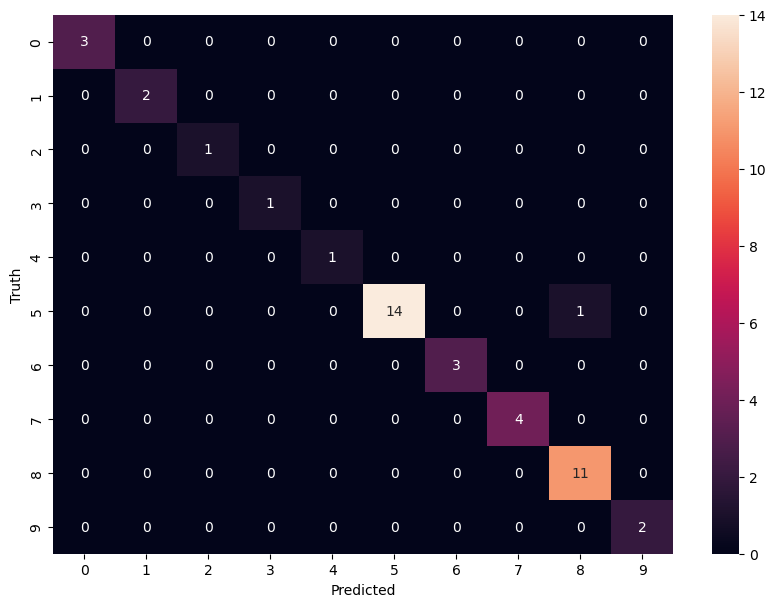

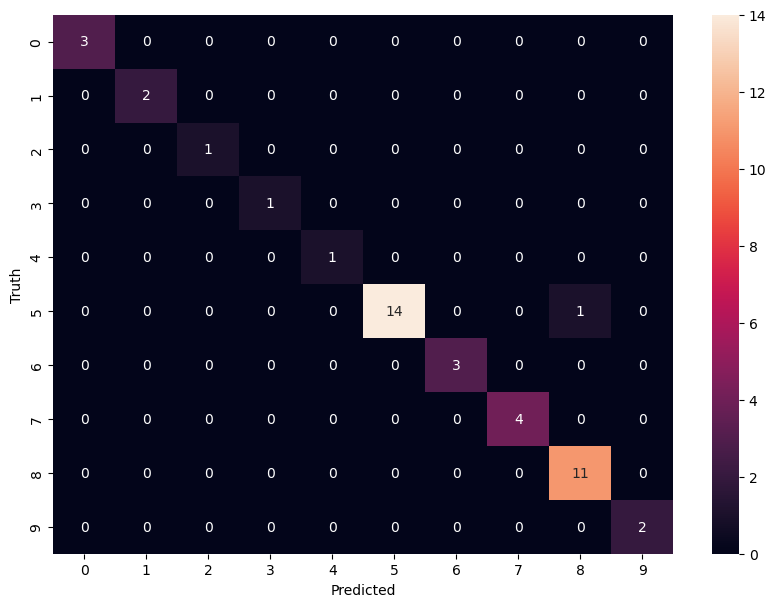

In [69]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

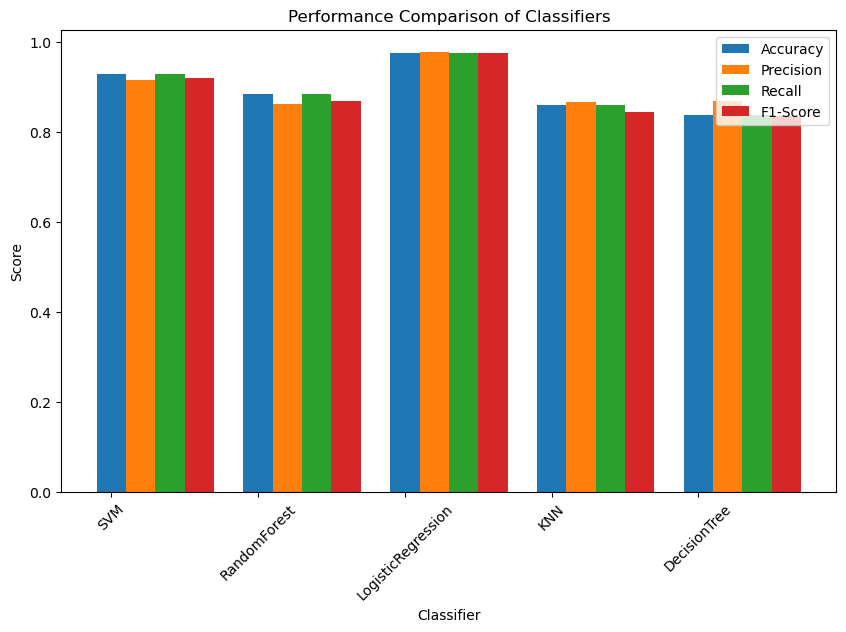

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract data for plotting
clf_names = list(results_dict.keys())
test_accuracies = [results_dict[clf]['test_accuracy'] for clf in clf_names]
test_precisions = [results_dict[clf]['test_precision'] for clf in clf_names]
test_recalls = [results_dict[clf]['test_recall'] for clf in clf_names]
test_f1s = [results_dict[clf]['test_f1'] for clf in clf_names]

# Plot bar chart
plt.figure(figsize=(10, 6))
x = range(len(clf_names))

plt.bar(x, test_accuracies, width=0.2, label="Accuracy", align='center')
plt.bar([i + 0.2 for i in x], test_precisions, width=0.2, label="Precision", align='center')
plt.bar([i + 0.4 for i in x], test_recalls, width=0.2, label="Recall", align='center')
plt.bar([i + 0.6 for i in x], test_f1s, width=0.2, label="F1-Score", align='center')

plt.xticks(x, clf_names, rotation=45)
plt.xlabel("Classifier")
plt.ylabel("Score")
plt.title("Performance Comparison of Classifiers")
plt.legend()
plt.show()


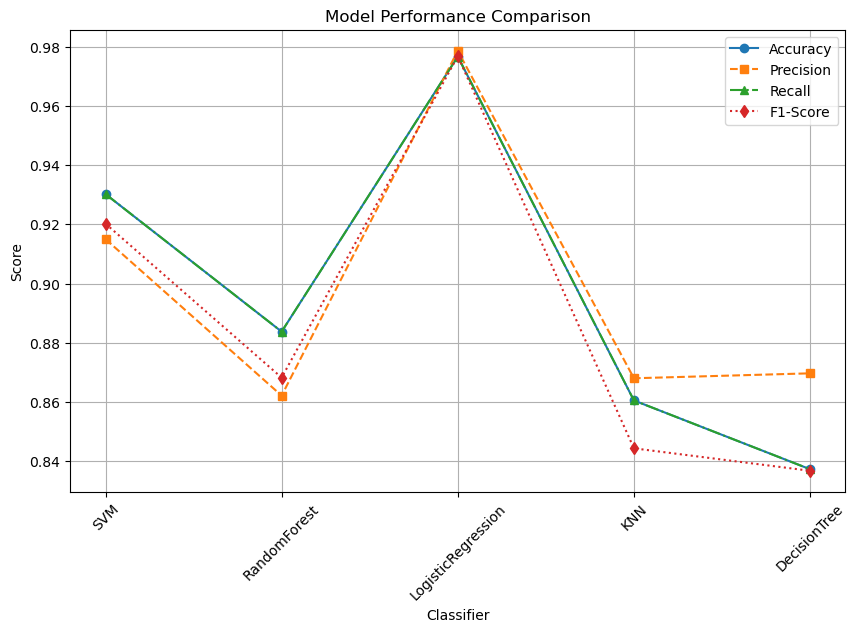

In [73]:
import matplotlib.pyplot as plt

# Extract data
clf_names = list(results_dict.keys())
test_accuracies = [results_dict[clf]['test_accuracy'] for clf in clf_names]
test_precisions = [results_dict[clf]['test_precision'] for clf in clf_names]
test_recalls = [results_dict[clf]['test_recall'] for clf in clf_names]
test_f1s = [results_dict[clf]['test_f1'] for clf in clf_names]

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(clf_names, test_accuracies, marker='o', linestyle='-', label="Accuracy")
plt.plot(clf_names, test_precisions, marker='s', linestyle='--', label="Precision")
plt.plot(clf_names, test_recalls, marker='^', linestyle='-.', label="Recall")
plt.plot(clf_names, test_f1s, marker='d', linestyle=':', label="F1-Score")

plt.xlabel("Classifier")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [75]:
class_dict

{'antoine dupont': 0,
 'Barry Bonds': 1,
 'cristiano ronaldo': 2,
 'Fan Zhendong': 3,
 'Gabrielle Reece': 4,
 'jessica alba': 5,
 'LeBron James': 6,
 'serena williams': 7,
 'Taylor Kitsch': 8,
 'usain bolt': 9}

### Save the trained model

In [77]:
#!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

### Save class dictionary

In [78]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))